# Task1
* Churn datasini kullanin. 6 Adet Grafik seçin ve datayi kullanarak grafikleri pythonda
  (Istenen Kolonlar Secilebilir)
* Pivot / groupby ile cizilen grafiklerin tablo versiyonu dökün
* Grafik ve pivotlarin benzerini excelde çizip python ile kiyaslayin


In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="dark")
sns.set(rc={'figure.figsize':(5,4)})
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def load_data(data = "TelcoCustomer.csv", sep = ";"):
    dataframe = pd.read_csv(data, sep=sep)
    return dataframe
df = load_data()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Understanding
def check_df(dataframe):
    print("##################### Data Shape #####################")
    print(dataframe.shape)
    print(" ")
    print("##################### Data Info #####################")
    print(dataframe.info())
    print(" ")
    print("##################### Data Missing Values #####################")
    print(dataframe.isnull().sum())
    print(" ")
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Data Shape #####################
(7043, 21)
 
##################### Data Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovie

In [4]:
# Total Charge dtype convert to int64
df["TotalCharges"] = df["TotalCharges"].str.replace(",", "", regex=True).replace(" ", "", regex=True) # -> Unable to parse string " " at position 488
df["TotalCharges"][488]
df["TotalCharges"]= pd.to_numeric(df["TotalCharges"])

''

In [5]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]]
cat_cols = [col for col in cat_cols if col not in "customerID"]
num_cols = [col for col in df.columns if col not in cat_cols]

In [6]:
print("Categoric columns list :", cat_cols)
print("Numeric columns list :", num_cols)

Categoric columns list : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numeric columns list : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# Data Visualization
 * Kategorik değişken: sütun grafik. countplot bar
 * Sayısal değişken: hist, boxplot

In [7]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame(
        {col_name: dataframe[col_name].value_counts(),
         "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    
    if plot:
        sns.countplot(x = dataframe[col_name], data=dataframe)
        plt.show(block=True)

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################


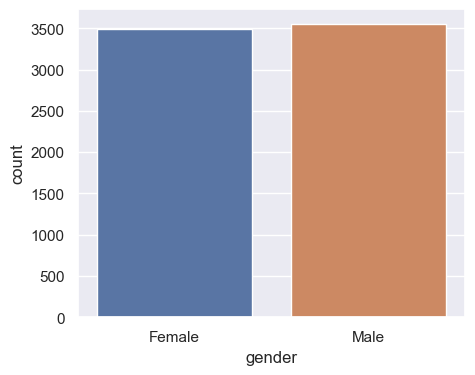

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
##########################################


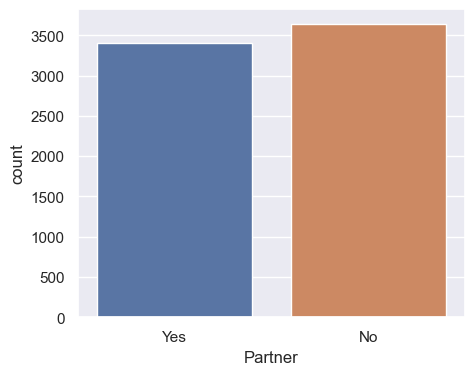

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
##########################################


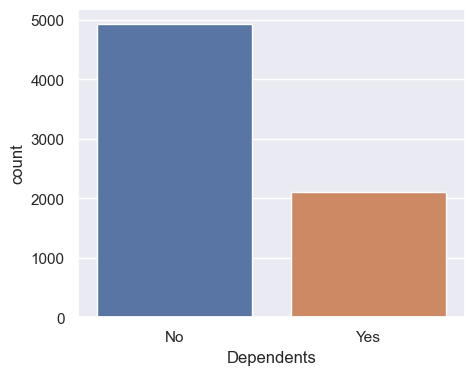

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
##########################################


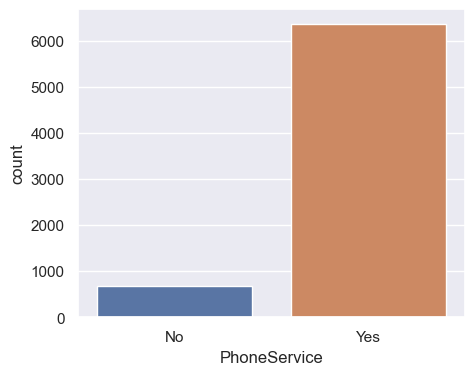

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################


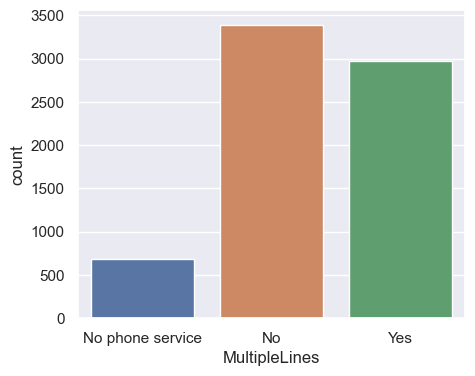

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
##########################################


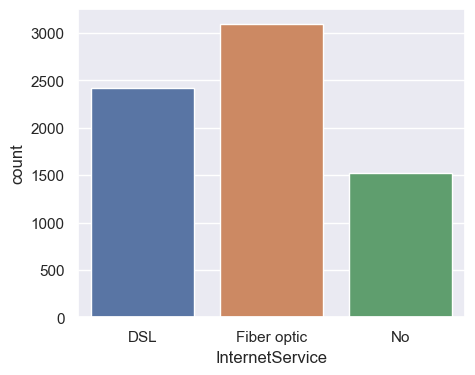

                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
##########################################


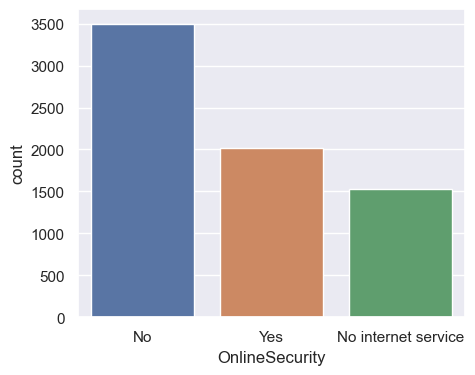

                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
##########################################


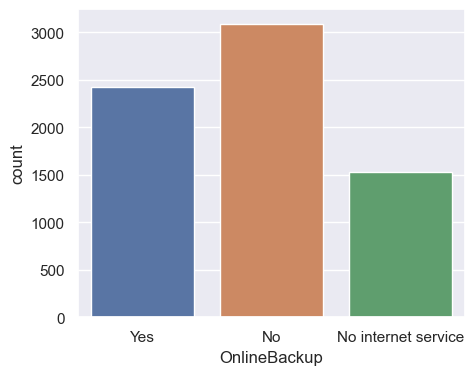

                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
##########################################


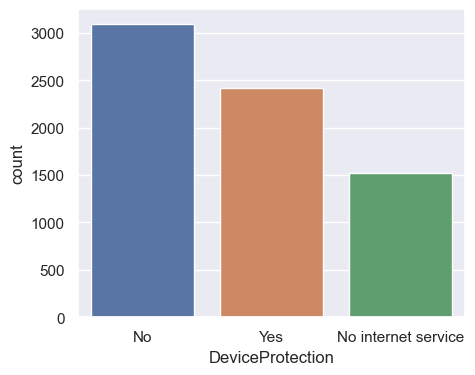

                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
##########################################


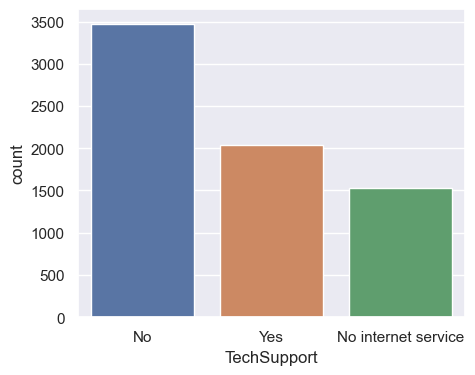

                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
##########################################


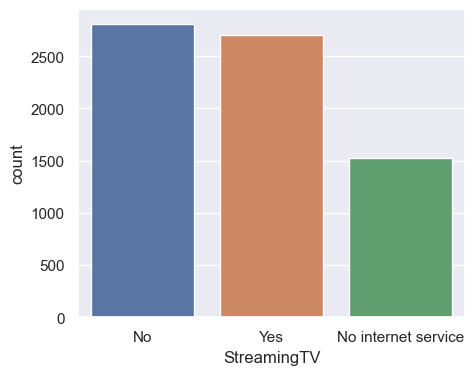

                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
##########################################


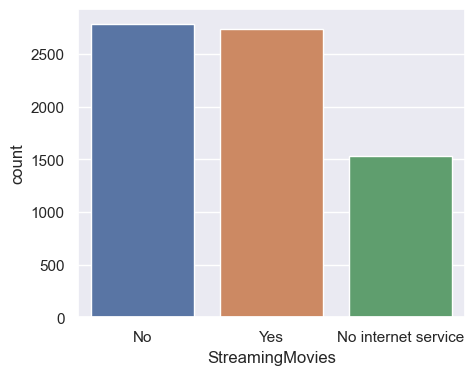

                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
##########################################


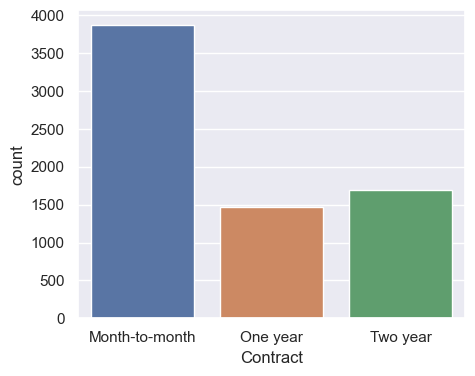

     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078
##########################################


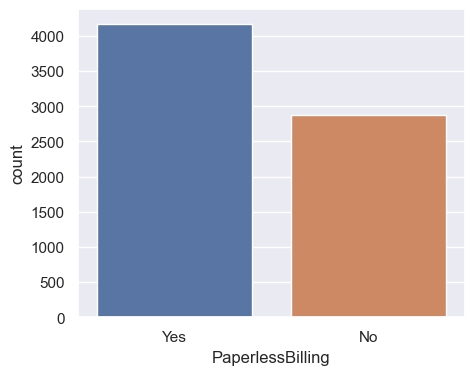

                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
##########################################


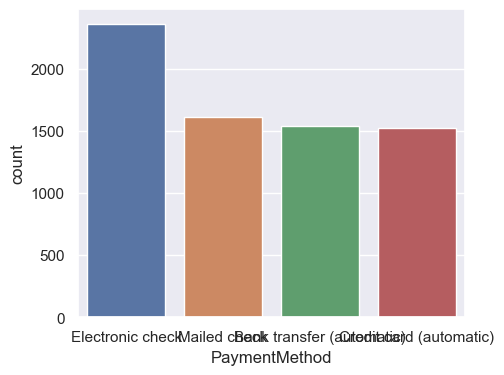

     Churn      Ratio
No    5174  73.463013
Yes   1869  26.536987
##########################################


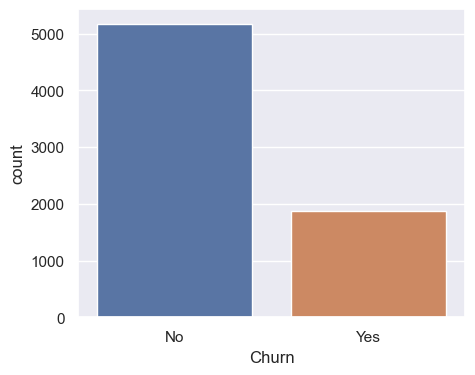

In [8]:
for col in cat_cols:
    if df[col].dtypes == "bool": # there is no bool dtype in dataset
        pass
    else:
        cat_summary(df, col)

# Pie Graph

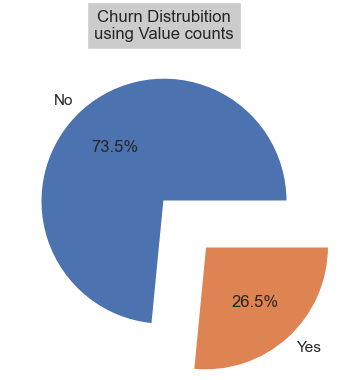

In [9]:
labels=df.Churn.value_counts().index
sizes=df.Churn.value_counts().values
explode=[0,0.5]

plt.pie(sizes,explode,labels,autopct="%1.1f%%")
plt.title("Churn Distrubition\n"+ "using Value counts", bbox={'facecolor':'0.8', 'pad':5})
plt.show();

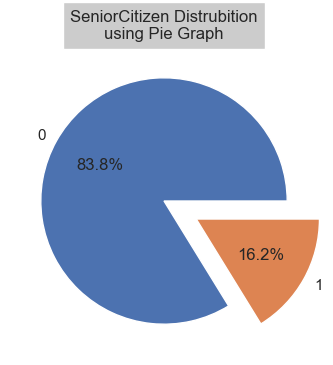

In [10]:
labels=df.SeniorCitizen.value_counts().index
sizes=df.SeniorCitizen.value_counts().values
explode=[0,0.3]

plt.pie(sizes,explode,labels,autopct="%1.1f%%")
plt.title("SeniorCitizen Distrubition\n"+ "using Pie Graph", bbox={'facecolor':'0.8', 'pad':5})
plt.show();

# Line Plot, Bar Plot, Histogram, Box plot
 * Sayısal değikenler en sık kullanılan plot çeşitleri

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

In [13]:
num_summary(df, "TotalCharges")

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
25%       401.450000
50%      1397.475000
75%      3794.737500
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


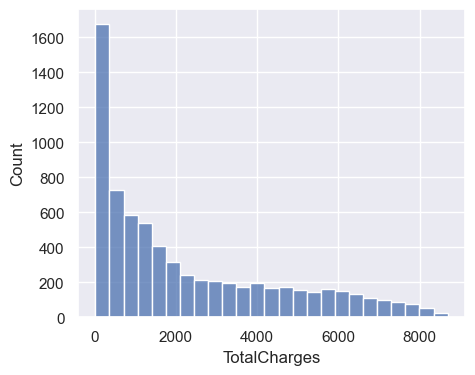

In [14]:
sns.histplot(x= df["TotalCharges"]);

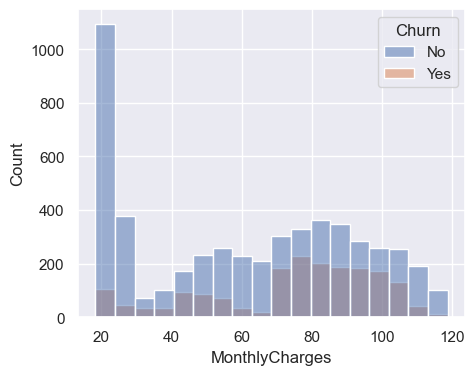

In [15]:
sns.histplot(x= df["MonthlyCharges"], hue= df["Churn"]);

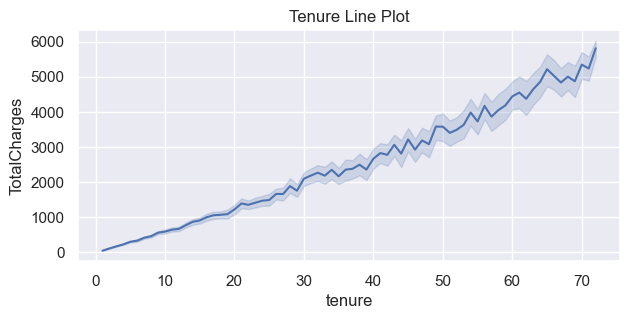

In [16]:
df.groupby("tenure").agg({"TotalCharges":"mean"})

plt.figure(figsize=(7, 3))
sns.lineplot(x= "tenure", y= "TotalCharges", data= df)
plt.title("Tenure Line Plot")
plt.show();

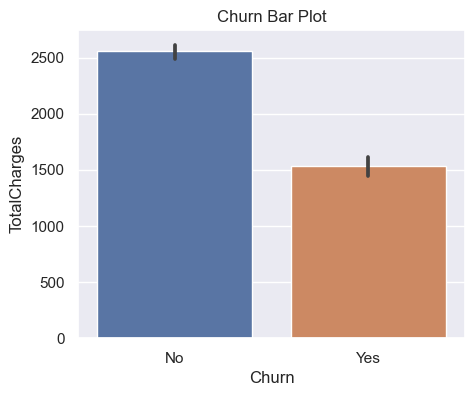

In [17]:
sns.barplot(x= "Churn", y= "TotalCharges", data=df)
plt.title("Churn Bar Plot")
plt.show();

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Contract'>

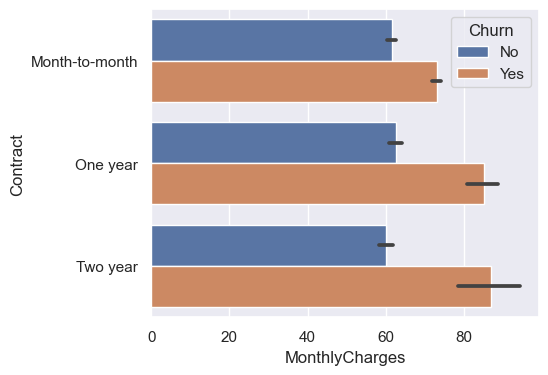

MonthlyCharges
Contract       Churn                
Month-to-month No          61.462635
               Yes         73.019396
One year       No          62.508148
               Yes         85.050904
Two year       No          60.012477
               Yes         86.777083

In [18]:
sns.barplot(x=df["MonthlyCharges"], y=df["Contract"], hue=df["Churn"])
plt.show();
df.groupby(["Contract", "Churn"])[["MonthlyCharges"]].mean()

In [19]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:xlabel='SeniorCitizen'>

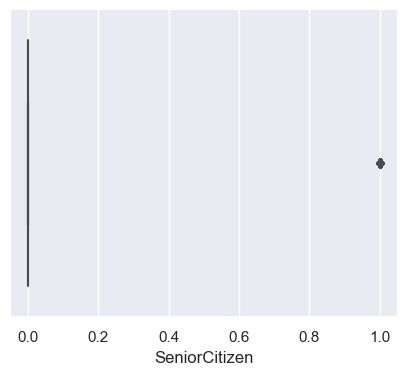

<AxesSubplot:xlabel='tenure'>

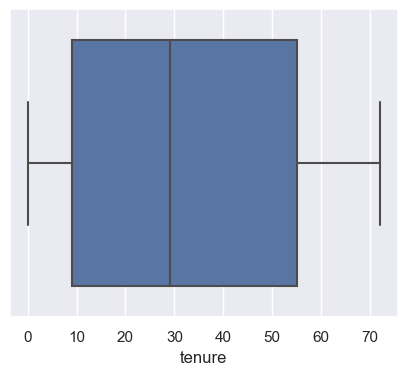

<AxesSubplot:xlabel='MonthlyCharges'>

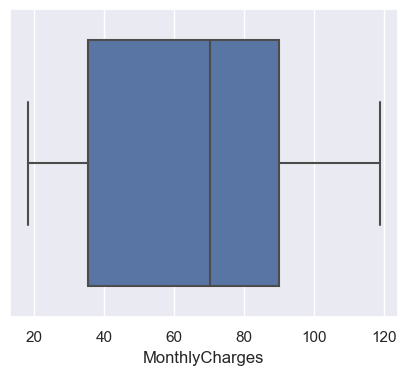

<AxesSubplot:xlabel='TotalCharges'>

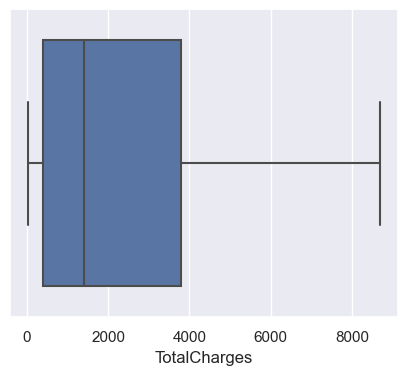

In [21]:
for i in num_cols:
    sns.boxplot(x = df[i])
    plt.show();

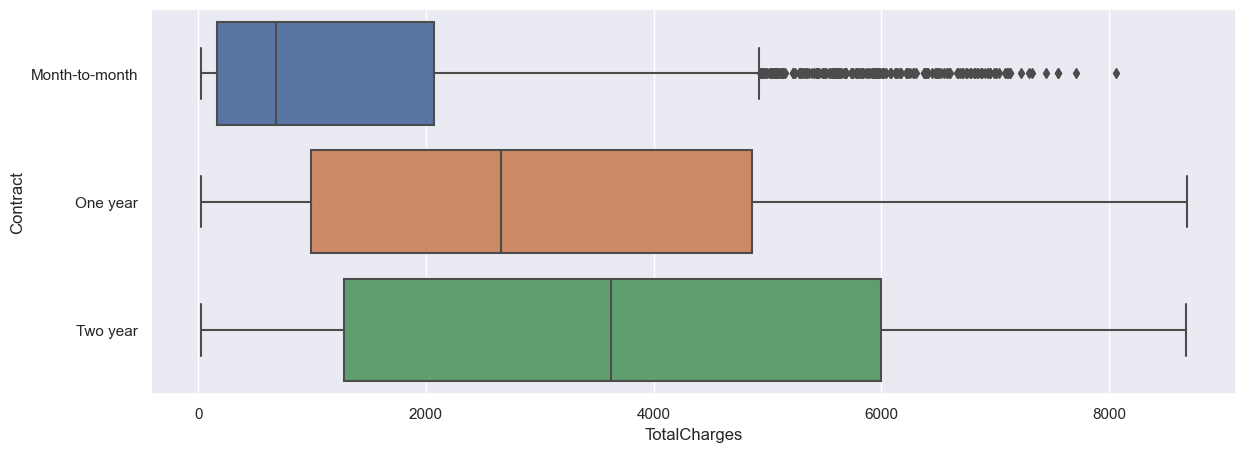

In [24]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="TotalCharges", y="Contract");

* Churn olan/olmayan muserileri ayni grafikte kiyaslayarak churn nedenlerini gorsel
olarak gosteriniz. (5-6 Degisken ile)
* "Car Crash" datasini kullanarak korelasyon heatmap cizin.

In [25]:
df_crash = sns.load_dataset("car_crashes")

In [28]:
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB
